In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

**Question 1

**Restrict the sample to women between 35 and 50,
then use the marital status variable DMDMARTL to partition this sample into two groups - women who are currently married, and women who are not currently married. Within each of these groups, calculate the proportion of women who have completed college. Calculate 95% confidence intervals for each of these proportions.


In [10]:
da = pd.read_csv("C:/Users/eli/Desktop/nhanes_2015_2016.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [232]:
condition1 = da['RIDAGEYR'] >= 35 
condition2 = da['RIDAGEYR'] <= 50
condition3 = da['RIAGENDR'] == 2
df = da[condition1 & condition2 & condition3]
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
34,83799,NaN,NaN,NaN,2,2,37,2,1.0,4.0,...,110.0,72.0,66.6,161.6,25.5,NaN,NaN,NaN,NaN,2.0
50,83828,1.0,NaN,2.0,2,2,39,1,2.0,3.0,...,100.0,62.0,71.3,162.0,27.2,36.8,34.6,29.1,94.6,NaN
52,83832,2.0,1.0,4.0,2,2,50,1,2.0,1.0,...,NaN,NaN,105.9,157.7,42.6,29.2,35.0,40.7,129.1,NaN
55,83837,2.0,2.0,NaN,2,2,45,1,1.0,2.0,...,114.0,68.0,77.5,148.3,35.2,30.5,34.0,34.4,107.6,2.0


In [233]:
 # currently married vs who are not currently married
df['DMDMARTL'] = df['DMDMARTL'].replace({1:1, 2:0, 3:0, 4:0, 5:0, 6:0, 77: np.nan})
# have completed college vs don't have completed college
df['DMDEDUC2'] = df['DMDEDUC2'].replace({1:0, 2:0, 3:0, 4:0, 5:1, 7:np.nan, 9:np.nan})

C:\Users\eli\AppData\Local\Temp/ipykernel_8076/2568906576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DMDMARTL'] = df['DMDMARTL'].replace({1:1, 2:0, 3:0, 4:0, 5:0, 6:0, 77: np.nan})
C:\Users\eli\AppData\Local\Temp/ipykernel_8076/2568906576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DMDEDUC2'] = df['DMDEDUC2'].replace({1:0, 2:0, 3:0, 4:0, 5:1, 7:np.nan, 9:np.nan})


In [234]:
dz = df[['DMDMARTL', 'DMDEDUC2']].dropna() 
dz

,DMDMARTL,DMDEDUC2
4,0.0,0.0
34,1.0,0.0
50,1.0,0.0
52,0.0,0.0
55,1.0,0.0
...,...,...
5658,0.0,0.0
5685,1.0,1.0
5689,1.0,0.0
5721,0.0,1.0


In [235]:
dx = dz.groupby('DMDMARTL').agg({'DMDEDUC2': [np.mean, np.size]})
dx.columns = ["Proportion of College Completed", "Total n"]
dx

,Proportion of College Completed,Total n
DMDMARTL,,
0.0,0.213018,338
1.0,0.360802,449


In [236]:
# 95% confidence intervals for unmarried women with college degree
p_hat1 = 0.213018
q_hat1 = 1 - p_hat1
n1 = 338
Z_score = 1.96
E = Z_score * np.sqrt(p_hat1 * q_hat1 / n1)
E

0.04365040446502326

In [237]:
low_b = p_hat1 - E
low_b

0.16936759553497677

In [238]:
upper_b = p_hat1 + E
upper_b

0.25666840446502326

**I am 95% sure that population proportion of unmarried women with college degree is between 0.16936759553497677 and 0.25666840446502326

In [239]:
# 95% confidence intervals for married women with college degree
p_hat2 =  0.360802
q_hat2 = 1 - p_hat2
n2 = 449
Z_score = 1.96
E_2 = Z_score * np.sqrt(p_hat2 * q_hat2 / n2)
E_2

0.04442066672158364

In [240]:
low_b_2 = p_hat2 - E_2
low_b_2

0.3163813332784164

In [241]:
upper_b_2 = p_hat2 + E_2
upper_b_2

0.40522266672158364

**I am 95% sure that population proportion of married women with college degree is between 0.3163813332784164 and 0.40522266672158364

**Question 2

**Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the difference between those two gender proportions.


In [93]:
df = da.copy()
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [95]:
df['smoker'] = da['SMQ020'].map({1: 1, 2: 0})  # np.nan represents a missing value
df['gender'] = df.RIAGENDR.map({1: 1, 2: 2})
dx = df[['smoker', 'gender']].dropna() # drop np.nan
dx

,smoker,gender
0,1.0,1
1,1.0,1
2,1.0,1
3,0.0,2
4,0.0,2
...,...,...
5730,1.0,2
5731,0.0,1
5732,1.0,2
5733,1.0,1


In [96]:
dz = dx.groupby('gender').agg({'smoker': [np.mean, np.size]}) 
dz

smoker      
            mean  size
gender                
1       0.513258  2753
2       0.304845  2972

In [97]:
# Estimate population proportion for men that are smokers
p_hat = 0.513258
q_hat = 1 - p_hat
n = 2753
E = Z_score * np.sqrt(p_hat * q_hat / n)
E

0.01867111442253757

In [98]:
low_b = p_hat - E
low_b

0.49458688557746244

In [99]:
upper_b = p_hat + E
upper_b

0.5319291144225375

In [101]:
# Another way
dz = dx.groupby('gender').agg({'smoker': [np.sum, np.mean, np.size]}) 
dz

smoker                
           sum      mean  size
gender                        
1       1413.0  0.513258  2753
2        906.0  0.304845  2972

In [114]:
from statsmodels.stats import proportion
male = proportion.proportion_confint(1413,2753)
male

(0.49458749263718593, 0.5319290347874418)

**I am 95% sure that population proportion for men smokers is between 0.49458749263718593 and 0.5319290347874418)

In [113]:
female = proportion.proportion_confint(906,2972) # for 95% conf. interval
female

(0.2882949879861214, 0.32139545615923526)

In [117]:
diff = Z_score * np.sqrt((0.513258 * (1 - 0.513258) / 2753) + (0.304845 * (1 - 0.304845) / 2972))
diff

0.024950565457887045

In [118]:
lower = (0.513258 - 0.304845) - diff
lower

0.18346243454211297

In [119]:
upper = (0.513258 - 0.304845) + diff
upper

0.23336356545788706

**I am 95% sure that population proportion difference between those two gender proportions (women smokers - men smokers) is between 0.18346243454211297 and 0.23336356545788706  

**Question 3

**Construct a 95% interval for height (BMXHT) in centimeters. Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches. Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters


In [122]:
df['BMXHT'].dropna()
df['BMXHT'].describe()

count    5673.000000
mean      166.142834
std        10.079264
min       129.700000
25%       158.700000
50%       166.000000
75%       173.500000
max       202.700000
Name: BMXHT, dtype: float64

In [123]:
X_bar = 166.142834
s =  10.079264
n = len(df)
n

5735

In [125]:
E = 1.96 * s/np.sqrt(n)
E

0.26086642156664686

In [126]:
lower = X_bar - E
lower

165.88196757843335

In [127]:
upper = X_bar + E
upper

166.40370042156664

**I am 95% that population mean for height (BMXHT) in centimeters is between 165.88196757843335 and 166.40370042156664

In [128]:
df['BMXHT'] = df['BMXHT'] / 2.54 # in inches
df['BMXHT']

0       72.637795
1       67.480315
2       66.968504
3       63.346457
4       64.921260
          ...    
5730    65.275591
5731    71.732283
5732    59.921260
5733    68.228346
5734    64.960630
Name: BMXHT, Length: 5735, dtype: float64

In [129]:
df['BMXHT'].describe()

count    5673.000000
mean       65.410565
std         3.968214
min        51.062992
25%        62.480315
50%        65.354331
75%        68.307087
max        79.803150
Name: BMXHT, dtype: float64

In [130]:
X_bar =  65.410565
s =  3.968214
n = len(df)
n

5735

In [131]:
E = 1.96 * s/np.sqrt(n)
E

0.10270331109401143

In [132]:
lower = X_bar - E
lower

65.30786168890599

In [133]:
upper = X_bar + E
upper

65.51326831109402

**I am 95% that population mean for height (BMXHT) in inches is between 65.30786168890599 and 65.51326831109402

In [134]:
lower_cm = lower * 2.54 # back to cm
lower_cm

165.8819686898212

In [136]:
upper_cm = upper * 2.54
upper_cm

166.40370151017882

**Question 4

**Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.


In [184]:
df = da.copy()
df['agegrp'] = pd.cut(x=df.RIDAGEYR, bins=[18,28,38,48,58,68,78,88])
df['gender'] = df.RIAGENDR.map({1: 1, 2: 2})

In [187]:
dk = df[['agegrp', 'gender', 'BMXBMI']].dropna()
dk

,agegrp,gender,BMXBMI
0,"(58, 68]",1,27.8
1,"(48, 58]",1,30.8
2,"(68, 78]",1,28.8
3,"(48, 58]",2,42.4
4,"(38, 48]",2,20.3
...,...,...,...
5730,"(68, 78]",2,21.5
5731,"(18, 28]",1,33.8
5732,"(78, 88]",2,31.0
5733,"(28, 38]",1,26.0


In [214]:
condition = dk['gender'] == 1 # only for males
dk_male = dk[condition]
dk_male

,agegrp,gender,BMXBMI
0,"(58, 68]",1,27.8
1,"(48, 58]",1,30.8
2,"(68, 78]",1,28.8
6,"(18, 28]",1,28.0
9,"(48, 58]",1,33.6
...,...,...,...
5726,"(48, 58]",1,32.0
5728,"(28, 38]",1,32.9
5729,"(18, 28]",1,21.0
5731,"(18, 28]",1,33.8


In [288]:
dz_male = dk_male.groupby('agegrp').agg({'BMXBMI': [np.mean,np.std]})
dz_male

BMXBMI          
               mean       std
agegrp                       
(18, 28]  27.058186  6.679515
(28, 38]  29.697180  6.726690
(38, 48]  29.514646  6.104950
(48, 58]  29.385132  6.151534
(58, 68]  29.232462  5.959024
(68, 78]  28.720270  5.336652
(78, 88]  27.464368  4.695650

In [279]:
dk_male.groupby('agegrp').size() # sample size n for each male group

agegrp
(18, 28]    452
(28, 38]    461
(38, 48]    396
(48, 58]    417
(58, 68]    459
(68, 78]    296
(78, 88]    174
dtype: int64

In [217]:
condition = dk['gender'] == 2 # only for females
dk_female = dk[condition]
dk_female

,agegrp,gender,BMXBMI
3,"(48, 58]",2,42.4
4,"(38, 48]",2,20.3
5,"(68, 78]",2,28.6
7,"(28, 38]",2,28.2
12,"(28, 38]",2,26.6
...,...,...,...
5724,"(38, 48]",2,20.9
5727,"(68, 78]",2,28.1
5730,"(68, 78]",2,21.5
5732,"(78, 88]",2,31.0


In [267]:
dz_female = dk_female.groupby('agegrp').agg({'BMXBMI': [np.mean,np.std]})
dz_female

BMXBMI          
               mean       std
agegrp                       
(18, 28]  28.019433  8.048854
(28, 38]  29.943443  7.959097
(38, 48]  31.003733  8.044642
(48, 58]  30.787361  7.647590
(58, 68]  31.054664  7.779502
(68, 78]  30.537818  6.780588
(78, 88]  27.850000  5.483781

In [278]:
dk_female.groupby(['agegrp']).size() # sample size n for each female group

agegrp
(18, 28]    494
(28, 38]    488
(38, 48]    509
(48, 58]    451
(58, 68]    461
(68, 78]    275
(78, 88]    198
dtype: int64

In [244]:
def find_limits_male_female (mean1, mean2, std1, std2, n1, n2):
    diff = 1.984 * np.sqrt((std1*std1 / n1) + (std2 * std2 / n2))
    low = (mean1 - mean2) - diff
    upper = (mean1 - mean2) + diff
    return (low, upper)

In [280]:
group1 = find_limits_male_female(27.058186,28.01943,6.679515,8.048854, 452,494)
group1

(-1.9009195785547144, -0.021568421445287034)

In [281]:
group2 = find_limits_male_female(29.697180,29.943443,6.726690,7.959097,461,488)
group2

(-1.1820732227099224, 0.6895472227099243)

In [283]:
group3 = find_limits_male_female(29.514646,31.003733,6.104950,8.044642,396,509)
group3

(-2.411039722918421, -0.5671342770815821)

In [284]:
group4 = find_limits_male_female(29.385132,30.787361,6.151534,7.647590,417,451)
group4

(-2.3224413547902314, -0.4820166452097725)

In [285]:
group5 = find_limits_male_female(29.232462,31.054664,5.959024,7.779502,459,461)
group5

(-2.717484435723311, -0.9269195642766833)

In [286]:
group6 = find_limits_male_female(28.720270,30.537818,5.336652, 6.780588,296,275)
group6

(-2.8234740361918718, -0.8116219638081328)

In [287]:
group7 = find_limits_male_female(27.464368,27.850000,4.695650, 5.483781,174,198)
group7

(-1.420165197337139, 0.6489011973371368)

**Question 5

**Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.


In [5]:
ds = da[['BPXSY1', 'BPXSY2']].dropna()

In [6]:
ds['BPXSY1'].describe()

count    5369.000000
mean      125.088471
std        18.493801
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64

In [7]:
ds['BPXSY2'].describe()

count    5369.000000
mean      124.413485
std        18.191573
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

In [42]:
sample_mean1 = 125.088471
sample_mean2 = 124.413485
s1 = 18.493801
s2 = 18.191573
n1 = 5369
n2 = 5369

In [43]:
E2 = 1.96 * s2 / np.sqrt(n2)
E2

0.4866084238686716

In [98]:
lower_first_sys_b = sample_mean1 - E1
lower_first_sys

124.59377824550587

In [99]:
upper_first_sys_b = sample_mean1 + E1
upper_first_sys

125.58316375449412

In [101]:
lower_second_sys_b = sample_mean2 - E2
lower_second_sys

123.92687657613132

In [100]:
upper_second_sys_b = sample_mean2 + E2
upper_second_sys

124.90009342386867

**I am 95% sure that population mean for first systolic blood pressure measures is between 124.59377824550587 and 125.58316375449412.
I am 95 % sure that population mean for second systolic blood pressure measures is between 123.92687657613132 and 124.90009342386867.

**Estimate the difference between the first and second systolic blood pressure measurements within a subject.

In [102]:
ds['diff'] = ds['BPXSY1'] - ds['BPXSY2']
ds['diff'].describe()

count    5369.000000
mean        0.674986
std         5.046465
min       -26.000000
25%        -2.000000
50%         0.000000
75%         4.000000
max        32.000000
Name: diff, dtype: float64

In [103]:
sd =  5.046465
mean_diff = 0.674986
diff = 1.96 * sd / np.sqrt(n1)
diff

0.13498845755440808

In [104]:
lower_b = mean_diff - diff
lower_b

0.5399975424455918

In [105]:
upper_b = mean_diff + diff
upper_b

0.8099744575544081

**I am 95% sure that the difference between the first and second systolic blood pressure measurements within a subject is between 0.5399975424455918 and 0.8099744575544081

**Question 6

**Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.


In [16]:
df = da.copy()
df['SMQ020'] = df['SMQ020'].map({1: 1, 2: 0}).dropna()
df['RIDAGEYR'] = df['RIDAGEYR'].dropna()
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1.0,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1.0,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1.0,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,0.0,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,0.0,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1.0,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,0.0,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1.0,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1.0,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [12]:
dz = df.groupby('SMQ020').agg({'RIDAGEYR': [np.mean,np.std]})
dz

RIDAGEYR           
             mean        std
SMQ020                      
0.0     45.259836  18.543286
1.0     52.096593  17.461141

In [37]:
mean0 = 45.259836
mean1 = 52.096593
s0 = 18.543286
s1 = 17.461141

In [38]:
condition = df['SMQ020'] == 0
n0 = len(df[condition]) # n for non - smoker
n0

3406

In [39]:
condition = df['SMQ020'] == 1
n1 = len(df[condition]) # n for smoker
n1

2319

In [40]:
diff = 1.96 * np.sqrt((s1 * s1 / n1) + (s0 * s0 / n0))
diff

0.9449367336348066

In [41]:
lower_b = (mean1 - mean0) - diff
lower_b

5.891820266365192

In [42]:
upper_b = (mean1 - mean0) + diff
upper_b

7.781693733634805

**I am 95% sure that the difference between the average age of a smoker, and the average age of a non-smoker is between 5.880982953347809 and 7.792531046652188.
 **Use graphical and numerical techniques to compare the variation in the ages of smokers to the      variation in the ages of non-smokers.

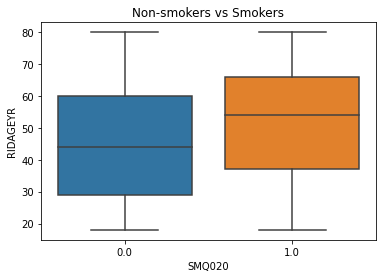

In [67]:
sns.boxplot(y = df['RIDAGEYR'], x = df['SMQ020'])
plt.title('Non-smokers vs Smokers')
plt.show()

In [60]:
dz = df[df['SMQ020'] == 1] 
dk = dz[['RIDAGEYR', 'SMQ020']]
dk

,RIDAGEYR,SMQ020
0,62,1.0
1,53,1.0
2,78,1.0
6,22,1.0
10,46,1.0
...,...,...
5723,72,1.0
5726,53,1.0
5730,76,1.0
5732,80,1.0


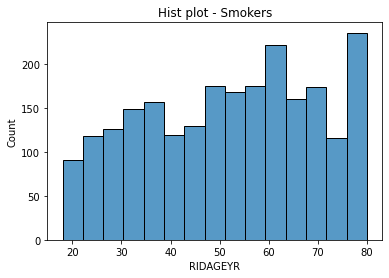

In [58]:
sns.histplot(dk['RIDAGEYR'])
plt.title('Hist plot - Smokers')
plt.show()

In [61]:
dk['RIDAGEYR'].describe() # for smokers

count    2319.000000
mean       52.096593
std        17.461141
min        18.000000
25%        37.000000
50%        54.000000
75%        66.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

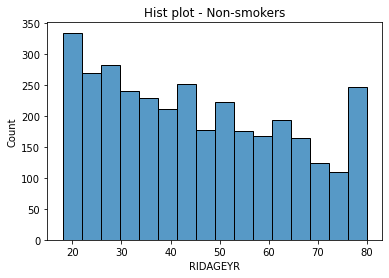

In [63]:
dl = df[df['SMQ020'] == 0] 
dh = dl[['RIDAGEYR', 'SMQ020']]
sns.histplot(dh['RIDAGEYR'])
plt.title('Hist plot - Non-smokers')
plt.show()

In [64]:
dh['RIDAGEYR'].describe()

count    3406.000000
mean       45.259836
std        18.543286
min        18.000000
25%        29.000000
50%        44.000000
75%        60.000000
max        80.000000
Name: RIDAGEYR, dtype: float64